In [2]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

iris = load_iris()

In [3]:
iris_data = iris.data
iris_df = pd.DataFrame(data=iris_data, columns = iris.feature_names)
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [4]:
print('feature 평균')
print(iris_df.mean())
print('\nfeature 분산')
print(iris_df.var())

feature 평균
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

feature 분산
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


In [5]:
# standard scaler -> 평균 0, 분산 1인 정규분포로 변환
scaler = StandardScaler()
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)

print('feature 평균')
print(iris_df_scaled.mean())
print('\nfeature 분산')
print(iris_df_scaled.var())

feature 평균
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64

feature 분산
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


In [24]:
# min-max scaler
scaler = MinMaxScaler()
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

print("iris_scaled type :", type(iris_scaled))
# transform() -> 변환된 데이터 셋이 numpy ndarray로 반환 -> 데이터프레임으로 변경
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)

print('\nfeature 최소')
print(iris_df_scaled.min())
print('\nfeature 최대')
print(iris_df_scaled.max())

iris_scaled type : <class 'numpy.ndarray'>

feature 최소
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64

feature 최대
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


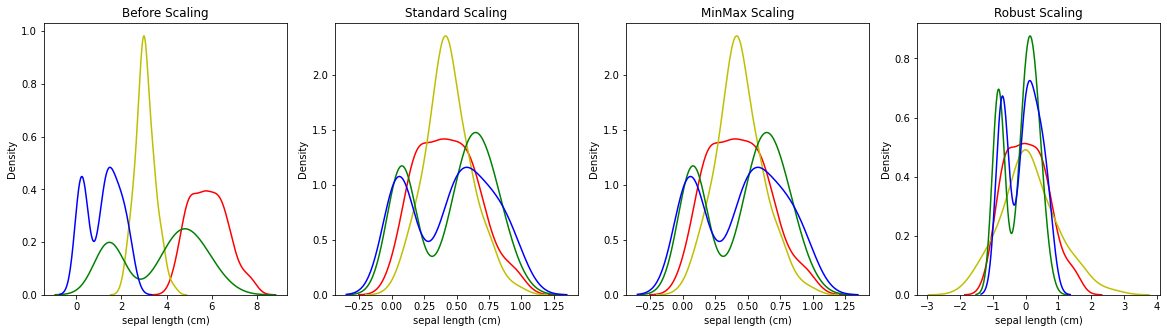

In [28]:
# Robust Scaler

rbscaler = RobustScaler()
rbscaler.fit(iris_df)

mscaler = MinMaxScaler()
mscaler.fit(iris_df)
iris_mscaled = mscaler.transform(iris_df)
iris_df_mscaled = pd.DataFrame(data=iris_mscaled, columns=iris.feature_names)
iris_df_mscaled

iris_rbscaled = rbscaler.transform(iris_df)
iris_df_rbscaled = pd.DataFrame(data=iris_rbscaled, columns=iris.feature_names)
iris_df_rbscaled

import matplotlib.pyplot as plt
import seaborn as sns
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(20,5))
ax1.set_title('Before Scaling')
sns.kdeplot(iris_df['sepal length (cm)'], ax = ax1, color = 'r')
sns.kdeplot(iris_df['sepal width (cm)'], ax = ax1, color = 'y')
sns.kdeplot(iris_df['petal length (cm)'], ax = ax1, color = 'g')
sns.kdeplot(iris_df['petal width (cm)'], ax = ax1, color = 'b')
ax2.set_title('Standard Scaling')
sns.kdeplot(iris_df_scaled['sepal length (cm)'], ax = ax2, color = 'r')
sns.kdeplot(iris_df_scaled['sepal width (cm)'], ax = ax2, color = 'y')
sns.kdeplot(iris_df_scaled['petal length (cm)'], ax = ax2, color = 'g')
sns.kdeplot(iris_df_scaled['petal width (cm)'], ax = ax2, color = 'b')
ax3.set_title('MinMax Scaling')
sns.kdeplot(iris_df_mscaled['sepal length (cm)'], ax = ax3, color = 'r')
sns.kdeplot(iris_df_mscaled['sepal width (cm)'], ax = ax3, color = 'y')
sns.kdeplot(iris_df_mscaled['petal length (cm)'], ax = ax3, color = 'g')
sns.kdeplot(iris_df_mscaled['petal width (cm)'], ax = ax3, color = 'b')
ax4.set_title('Robust Scaling')
sns.kdeplot(iris_df_rbscaled['sepal length (cm)'], ax = ax4, color = 'r')
sns.kdeplot(iris_df_rbscaled['sepal width (cm)'], ax = ax4, color = 'y')
sns.kdeplot(iris_df_rbscaled['petal length (cm)'], ax = ax4, color = 'g')
sns.kdeplot(iris_df_rbscaled['petal width (cm)'], ax = ax4, color = 'b')
plt.show()